In [305]:
# Importing the important packages:-
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sb 
from nltk import word_tokenize,sent_tokenize,regexp_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import PorterStemmer,LancasterStemmer,SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
import string 
import warnings
warnings.filterwarnings('ignore')
import wordcloud 
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [306]:
# importing the data:-
df=pd.read_csv('rating and review.csv')

In [283]:
# first 5 data :-
df.head()

,Unnamed: 0,Rating,Review
0,0,5,Well while switching from android to iOS the f...
1,1,5,awesome phone to have. it has got many smart f...
2,2,5,I can say I'm damn impressed with iPhone 11. A...
3,3,5,I am using this phone for 5 days and its one o...
4,4,5,After 1 month use I found camera quality best ...


In [307]:
# last 5 data:-
df.tail()

,Unnamed: 0,Rating,Review
20616,20616,5,Thank you Gionee For giving wonderful smart wa...
20617,20617,5,Excellent product... value for money💰..\nCons\...
20618,20618,4,"Good smart watch, value for the money. perfect..."
20619,20619,4,Awesome Smart watch at this price tag. Just en...
20620,20620,4,Its a decent product for the price better than...


In [308]:
#shape of the data (rows and columns):-
df.shape

(20621, 3)

In [309]:
# Dropped irrelevent columns:-
df.drop('Unnamed: 0',axis=1,inplace=True)

In [310]:
df.shape
# now here we see the there are 20621 rows and 2 columns 

(20621, 2)

In [311]:
# checking the 4.5 Rating in dataset:-
r=df.query('Rating==4.5').index.tolist()

In [312]:
#list is empty here:-
r

[]

In [313]:
df.isnull().sum()

Rating    0
Review    0
dtype: int64

<AxesSubplot:>

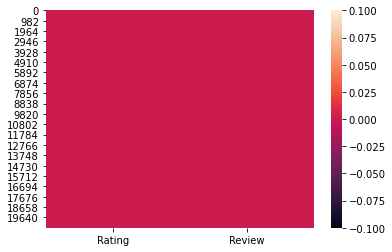

In [314]:
# checking null values:-
sb.heatmap(df.isnull())

so, there is no null values here so we need, but still reviews has some irrlevent words we need to preprocessed,before vectorization 

# EDA

In [315]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20621 entries, 0 to 20620
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Rating  20621 non-null  int64 
 1   Review  20621 non-null  object
dtypes: int64(1), object(1)
memory usage: 322.3+ KB


<AxesSubplot:xlabel='Rating', ylabel='count'>

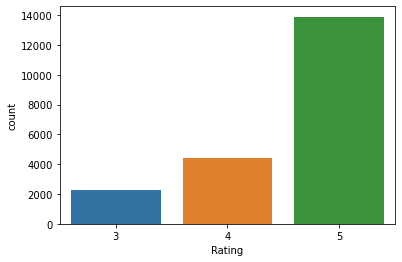

In [316]:
sb.countplot(df['Rating'])

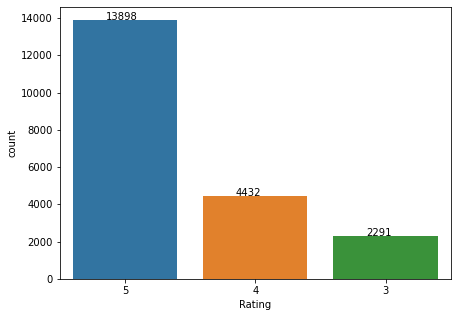

In [317]:
plt.figure(figsize=(7,5))
ax=sb.countplot(x=df['Rating'],data=df,order=df['Rating'].value_counts().index)
for a,label in  zip(ax.patches,df['Rating'].value_counts()):
    ax.annotate(label,(a.get_x()+0.25,a.get_height()+0.7))

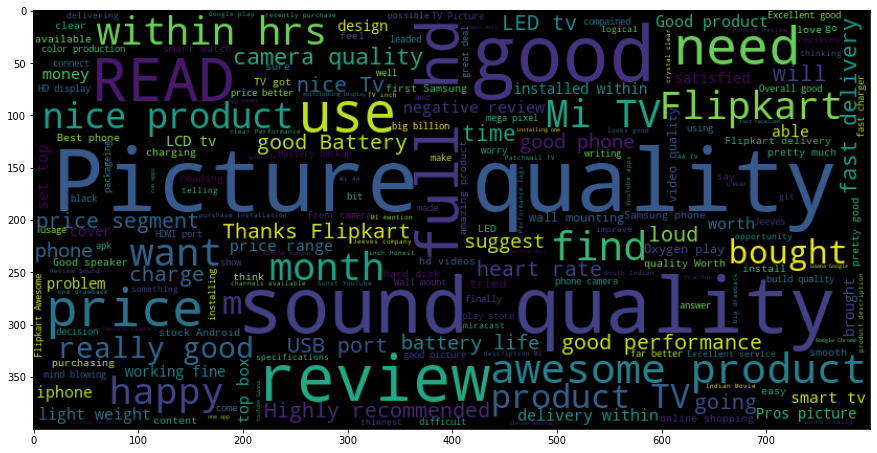

In [318]:
word_cloud=WordCloud(height=400,width=800,max_words=200).generate(' '.join(df['Review'].tolist()))
plt.figure(figsize=(15,12))
plt.imshow(word_cloud)

# precprocessing 

In [319]:
import neattext as nfx

In [320]:
dir(nfx)

['AUTOMATED_READ_INDEX',
 'BTC_ADDRESS_REGEX',
 'CONTRACTIONS_DICT',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Callable',
 'Counter',
 'CreditCard_REGEX',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'FUNCTORS_WORDLIST',
 'HASTAG_REGEX',
 'HTML_TAGS_REGEX',
 'List',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PUNCT_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextCleaner',
 'TextExtractor',
 'TextFrame',
 'TextMetrics',
 'TextPipeline',
 'Tuple',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 'ZIP_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 'clean_text',
 'defaultdict',
 'digit2words',
 'emoji_explainer',
 'emojify',
 'explainer',
 'extract_btc_address',
 

In [321]:
df['before_cleaning']=df['Review'].map(lambda Review :len(Review) )

In [322]:
df.head()

,Rating,Review,before_cleaning
0,5,Well while switching from android to iOS the f...,457
1,5,awesome phone to have. it has got many smart f...,243
2,5,I can say I'm damn impressed with iPhone 11. A...,510
3,5,I am using this phone for 5 days and its one o...,422
4,5,After 1 month use I found camera quality best ...,213


In [323]:
df['Review']=df['Review'].apply(nfx.remove_currency_symbols)
df['Review']=df['Review'].apply(nfx.remove_emails)
df['Review']=df['Review'].apply(nfx.remove_emojis)
df['Review']=df['Review'].apply(nfx.remove_hashtags)
df['Review']=df['Review'].apply(nfx.remove_non_ascii)
df['Review']=df['Review'].apply(nfx.remove_punctuations)
df['Review']=df['Review'].apply(nfx.remove_special_characters)
df['Review']=df['Review'].apply(nfx.remove_numbers)
df['Review']=df['Review'].apply(nfx.remove_phone_numbers)

In [324]:
df['Review']=df['Review'].apply(nfx.remove_stopwords)

In [275]:
lemmit=WordNetLemmatizer()
df['Review']=df['Review'].apply(lemmit.lemmatize)

In [ ]:
snowball = SnowballStemmer('english')

In [328]:
df


,Rating,Review,before_cleaning
0,5,switching android iOS thing need careful loose...,457
1,5,awesome phone got smart features apart mind bl...,243
2,5,Im damn impressed iPhone says iPhone toughest ...,510
3,5,phone days best camera screen oled coming ipho...,422
4,5,month use found camera quality best compared p...,213
...,...,...,...
20616,5,Thank Gionee giving wonderful smart watch call...,231
20617,5,Excellent product value moneyConsfew watch fac...,321
20618,4,Good smart watch value money perfectly working...,154
20619,4,Awesome Smart watch price tag ensure download ...,302


In [329]:
df['n_Review']=df['Review'].apply(lambda x:(lemmit.lemmatize(word) for word in word_tokenize(x)))

In [332]:
df.drop('n_Review',axis=1,inplace=True)

In [333]:
df['after_cleaning']=df['Review'].map(lambda Review :len(Review))


In [334]:
df

,Rating,Review,before_cleaning,after_cleaning
0,5,switching android iOS thing need careful loose...,457,274
1,5,awesome phone got smart features apart mind bl...,243,153
2,5,Im damn impressed iPhone says iPhone toughest ...,510,296
3,5,phone days best camera screen oled coming ipho...,422,214
4,5,month use found camera quality best compared p...,213,154
...,...,...,...,...
20616,5,Thank Gionee giving wonderful smart watch call...,231,158
20617,5,Excellent product value moneyConsfew watch fac...,321,244
20618,4,Good smart watch value money perfectly working...,154,105
20619,4,Awesome Smart watch price tag ensure download ...,302,193


In [335]:
# LIst of Rating 3 Rows 
k=df[df['Rating']==3]

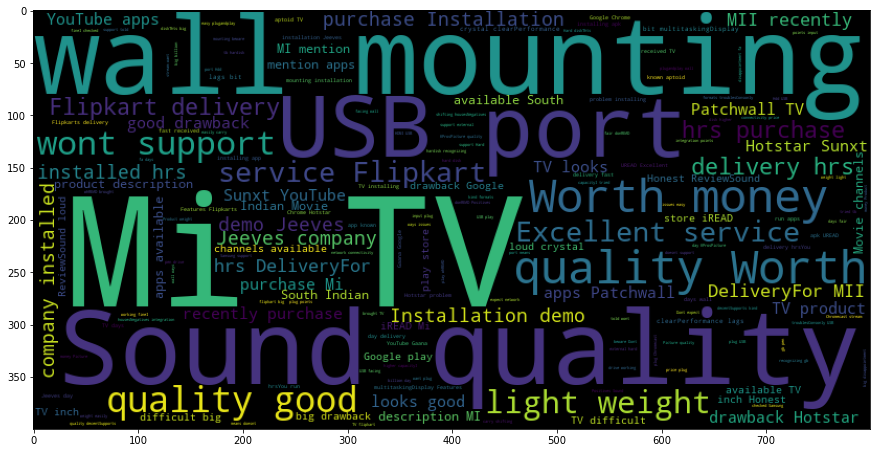

In [336]:
# RAting 3 Rows word look like:-
word_cloud=WordCloud(height=400,width=800,max_words=200).generate(' '.join(k['Review'].tolist()))
plt.figure(figsize=(15,12))
plt.imshow(word_cloud)

In [337]:
# These are the vizulization for Rating 
p=df[df['Rating']==4]

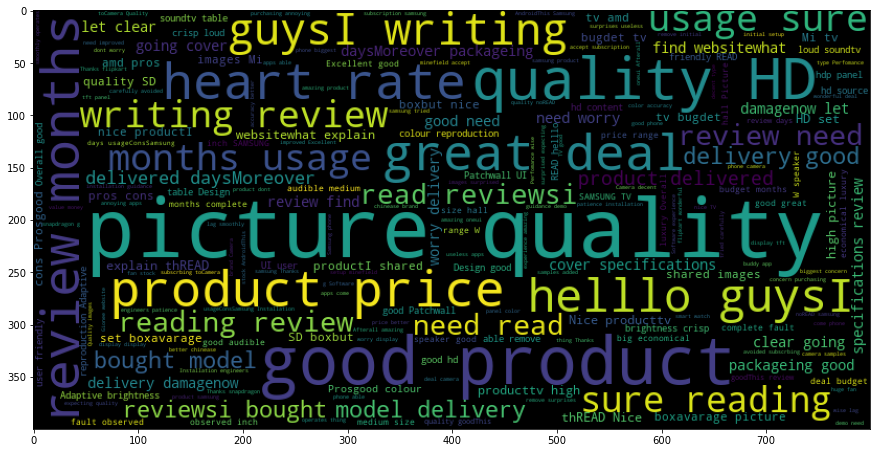

In [338]:
# These are display that we see the words in Rating 4
word_cloud=WordCloud(height=400,width=800,max_words=200).generate(' '.join(p['Review'].tolist()))
plt.figure(figsize=(15,12))
plt.imshow(word_cloud)

In [339]:
g=df[df['Rating']==5]

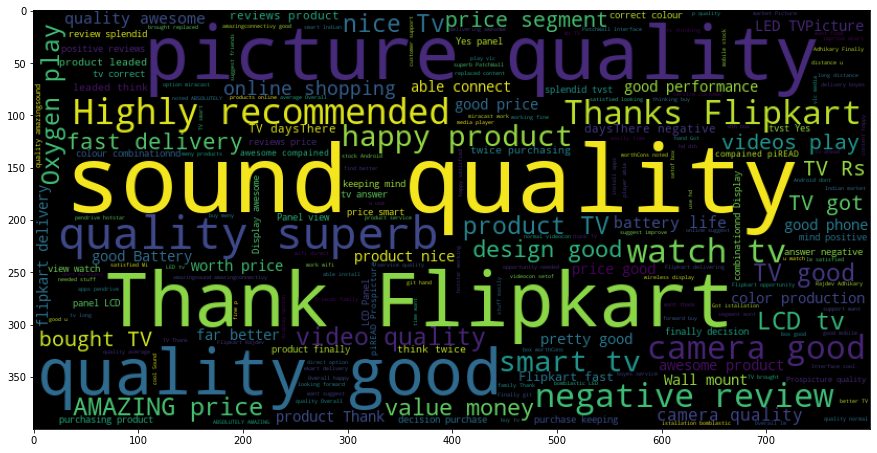

In [340]:
# vizualizing the rating 4 words look like:-
word_cloud=WordCloud(height=400,width=800,max_words=200).generate(' '.join(g['Review'].tolist()))
plt.figure(figsize=(15,12))
plt.imshow(word_cloud)

In [341]:
df.corr()

,Rating,before_cleaning,after_cleaning
Rating,1.000000,-0.210990,-0.209456
before_cleaning,-0.210990,1.000000,0.975291
after_cleaning,-0.209456,0.975291,1.000000


<AxesSubplot:>

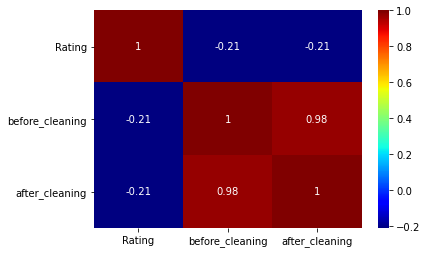

In [342]:
sb.heatmap(df.corr(),annot=True,cmap='jet')

# Vectorizer

In [343]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_features = 14000, stop_words='english')


In [344]:
X = tfidf.fit_transform(df['Review'])

In [345]:
Y=df['Rating']

In [346]:
print(X.shape ,'/t' ,Y.shape)

(20621, 1052) /t (20621,)


In [347]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.32, random_state=42, stratify=Y)

In [366]:
from imblearn.combine import SMOTETomek
from collections import Counter
os=SMOTETomek(sampling_strategy = {3: 14000, 4: 14000, 5: 14000})
x_train_ns,y_train_ns=os.fit_resample(x_train,y_train)
print("The number of classes before fit{}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fitCounter({5: 9450, 4: 3014, 3: 1558})
The number of classes after fit Counter({4: 14000, 3: 14000, 5: 14000})


In [348]:
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.metrics import f1_score,precision_score, multilabel_confusion_matrix, accuracy_score,jaccard_score, recall_score, hamming_loss
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import cross_val_score

In [349]:
svc = LinearSVC()
lr = LogisticRegression(solver='lbfgs')
mnb = MultinomialNB()
lgb = LGBMClassifier()
sgd = SGDClassifier()
rf = RandomForestClassifier()

In [350]:
def print_score(y_pred,clf):
    print('classifier:',clf)
    print("Jaccard score: {}".format(jaccard_score(y_test,y_pred,average='micro')))
    print("Accuracy score: {}".format(accuracy_score(y_test,y_pred)))
    print("f1_score: {}".format(f1_score(y_test,y_pred,average='micro')))
    print("Precision : ", precision_score(y_test,y_pred,average='micro'))
    print("Recall: {}".format(recall_score(y_test,y_pred,average='micro')))
    print("Hamming loss: ", hamming_loss(y_test,y_pred))
    print("Confusion matrix:\n ", multilabel_confusion_matrix(y_test,y_pred))
    print('========================================\n')    

In [380]:
for classifier in [svc,lr,mnb,sgd,lgb,rf]:
    clf = OneVsRestClassifier(classifier)
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    print_score(y_pred, classifier)

classifier: LinearSVC()
Jaccard score: 0.9219455366244357
Accuracy score: 0.9593877860281861
f1_score: 0.9593877860281861
Precision :  0.9593877860281861
Recall: 0.9593877860281861
Hamming loss:  0.04061221397181391
Confusion matrix:
  [[[5866    0]
  [   0  733]]

 [[5181    0]
  [ 268 1150]]

 [[1883  268]
  [   0 4448]]]

classifier: LogisticRegression()
Jaccard score: 0.9219455366244357
Accuracy score: 0.9593877860281861
f1_score: 0.9593877860281861
Precision :  0.9593877860281861
Recall: 0.9593877860281861
Hamming loss:  0.04061221397181391
Confusion matrix:
  [[[5866    0]
  [   0  733]]

 [[5181    0]
  [ 268 1150]]

 [[1883  268]
  [   0 4448]]]

classifier: MultinomialNB()
Jaccard score: 0.9219455366244357
Accuracy score: 0.9593877860281861
f1_score: 0.9593877860281861
Precision :  0.9593877860281861
Recall: 0.9593877860281861
Hamming loss:  0.04061221397181391
Confusion matrix:
  [[[5866    0]
  [   0  733]]

 [[5181    0]
  [ 268 1150]]

 [[1883  268]
  [   0 4448]]]

classi

### all most all the model showing same result so here i am selecting the random forest classifier for prediction model 

In [383]:
data={'model':['linearSVC','logistic','multinomial','sdg','LGBM','Random forest '],
  'acc_score':[ 0.9046464254534872,0.9046464254534872,0.8803957706858084,0.9046464254534872,0.9046464254534872,0.9046464254534872],
     'Jaccard score': [ 0.9219455366244357,0.9219455366244357,0.9127536231884058,0.9127536231884058,0.9219455366244357,0.9219455366244357],
     'f1_score':[ 0.9593877860281861,0.9593877860281861,0.9543870283376269,0.9593877860281861,0.9593877860281861,0.9593877860281861],
     'Hamming loss':[ 0.04061221397181391, 0.04061221397181391,0.04061221397181391 ,0.04061221397181391,0.04061221397181391, 0.04061221397181391]}

In [384]:
score_data=pd.DataFrame(data)

In [385]:
score_data

,model,acc_score,Jaccard score,f1_score,Hamming loss
0,linearSVC,0.904646,0.921946,0.959388,0.040612
1,logistic,0.904646,0.921946,0.959388,0.040612
2,multinomial,0.880396,0.912754,0.954387,0.040612
3,sdg,0.904646,0.912754,0.959388,0.040612
4,LGBM,0.904646,0.921946,0.959388,0.040612
5,Random forest,0.904646,0.921946,0.959388,0.040612


### so now we see cross validation for overfitting models .

In [355]:
models=[svc,lr,mnb,sgd,lgb,rf]

# cross validation 

In [376]:
from sklearn.model_selection import cross_val_score

In [382]:
for i in models:
    print(cross_val_score(i,X,Y,cv=13).mean())
    

0.9046464254534872
0.9046464254534872
0.8803957706858084
0.9046464254534872
0.9046464254534872
0.9046464254534872


In [390]:
for i in models:
    print(accuracy_score(y_test,y_pred))
    
    

0.9593877860281861
0.9593877860281861
0.9593877860281861
0.9593877860281861
0.9593877860281861
0.9593877860281861


In [392]:
for i in models:
    print(jaccard_score(y_test,y_pred,average='micro'))
    

0.9219455366244357
0.9219455366244357
0.9219455366244357
0.9219455366244357
0.9219455366244357
0.9219455366244357


In [ ]:
for i in models:
    print(jaccard_score(y_test,y_pred,average='micro'))
    

In [396]:
data={'model':['linearSVC','logistic','multinomial','sdg','LGBM','Random forest '],
  'acc_score':[ 0.9593877860281861,0.9593877860281861,0.9593877860281861,0.9593877860281861,0.9593877860281861,0.9593877860281861,],
     'Jaccard score': [ 0.9219455366244357,0.9219455366244357,0.9127536231884058,0.9127536231884058,0.9219455366244357,0.9219455366244357],
     'f1_score':[ 0.91013789968177,0.91013789968177,0.91013789968177,0.91013789968177,0.91013789968177,0.91013789968177],
     'Hamming loss':[ 0.04061221397181391, 0.04061221397181391,0.04061221397181391 ,0.04061221397181391,0.04061221397181391, 0.04061221397181391],
     'cross val score':[0.9046464254534872,0.9046464254534872,0.8803957706858084,0.9046464254534872,0.9046464254534872,0.9046464254534872]}


In [397]:
score_card=pd.DataFrame(data)

In [398]:
score_card

,model,acc_score,Jaccard score,f1_score,Hamming loss,cross val score
0,linearSVC,0.959388,0.921946,0.910138,0.040612,0.904646
1,logistic,0.959388,0.921946,0.910138,0.040612,0.904646
2,multinomial,0.959388,0.912754,0.910138,0.040612,0.880396
3,sdg,0.959388,0.912754,0.910138,0.040612,0.904646
4,LGBM,0.959388,0.921946,0.910138,0.040612,0.904646
5,Random forest,0.959388,0.921946,0.910138,0.040612,0.904646


so, it is obivous that cross val score of Logistic Regression is showing as effective result as any other models.

## Now, i am selecting logistic regression model for the prediction 

# saving the models

In [360]:
import joblib
filename='Rating and Reviews prediction models'

In [361]:
joblib.dump(lr,filename)


['Rating and Reviews prediction models']

In [362]:
joblib.load('Rating and Reviews prediction models')

LogisticRegression()

In [8]:
|

SyntaxError: invalid syntax (<ipython-input-8-4b37ef281455>, line 1)